## STAT 207 Lab 4: Sampling Distributions, Probability, and Data Cleaning - [25 total points] - Solutions

Due: Wednesday, February 24, 11:59pm CST

## <u>Case Study</u>: Household Income and Education Level in U.S. Counties
In this lab we will explore the statistical concepts that we've learned this week while also examining the **median household income (median_hh_income)**, the **median education level (median_edu)**, and the relationship between these variables in a **population** of 3142 U.S. counties.

## 1. <u>Preliminaries</u>
### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 1a. [0.5 pt] Read the county.csv into a dataframe, call it df, and display the first five rows.

In [2]:
df = pd.read_csv('county.csv')
df.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671,54571,55504,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.7,55317,none
1,Baldwin County,Alabama,140415,182265,212628,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562,none
2,Barbour County,Alabama,29038,27457,25270,-6.22,27.2,68.0,11.1,5.9,no,hs_diploma,17891.73,33368,partial
3,Bibb County,Alabama,20826,22915,22668,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404,none
4,Blount County,Alabama,51024,57322,58013,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412,none


### 1b. [0.5pt] Display the shape of the dataframe.

In [3]:
df.shape

(3142, 15)

### 1c. [4 pt] Data cleaning and data type checking
We plan to analyze the "median_hh_income" variable as well as the "median_edu" variable in this assignment. In order to ensure that our subsequent functions work appropriately on these variables, you should do the following.
1. Make sure you have identified any values that have been encoded in the csv to represent a missing value. 
2. Make sure that the values in your "median_hh_income" variable are interpreted as numerical values. If not, fix this using the methods we discussed in class.
3. Delete any rows in your dataframe that have missing values. Remember, some "missing values", in the way that they're currently encoded are not always detectable by Python.

#### Warning: If you don't do this step appropriately, you may have issues when you run other functions.

#### Hint: There are some missing values in this csv. You may need to get creative (beyond what we taught you in class, but still using functions you know) to figure out what they are.


In [4]:
for i in df['median_hh_income'].unique():
    print(i)
#many many unique numbers so try something else?

55317
52562
33368
43404
47412
29655
36326
43686
37342
40041
43501
32122
33827
37287
37396
49821
45477
30434
34792
39467
38937
40997
44711
30065
38842
54981
35026
42064
36541
39501
39293
20954
34679
45569
42803
39281
49321
36016
44888
43779
47564
52831
29785
32308
61318
32255
35719
41104
45802
26036
46545
47529
22973
36220
35684
39485
38988
53483
74063
21663
39219
42181
50513
38872
42185
27012
35362
66607
85192
82271
53853
79500
83295
58708
76250
70640
57900
90749
65279
67321
74167
45208
74887
53821
77266
61533
63490
52114
70765
70673
63866
86019
data unavailable
56094
64583
37819
32360
47847
53523
41179
48173
56298
36479
58580
41567
38798
48676
52628
39630
48259
43253
38532
36407
40072
61271
40727
36310
37225
39686
32412
37144
32219
42312
44840
37072
39638
45672
43504
38558
41081
35794
27036
36092
50316
39472
36051
41672
49968
45566
38701
40626
34851
39945
39135
32783
37630
35758
32500
37603
27901
38873
36963
37982
57290
42894
36113
41862
36417
31584
35252
36995
38134
32136
46168
26652

50157
92838
53877
57153
56200
61652
60222
52527
53693
89968
55459
51758
44281
44523
38944
38123
40293
37109
31287
32396
51164
48464
40854
60716
40735
68327
51584
39428
48649
59684
38115
41979
37070
40002
36261
49391
44737
65758
55640
45806
53493
36679
56393
32929
48369
48344
46626
52481
36030
52089
49253
33573
50323
45538
50454
35806
45713
40532
55957
54610
37256
49272
37515
50782
38776
40659
40563
35969
61695
42534
38254
54468
46187
51457
33508
65522
45211
47264
49357
44039
44921
43526
43598
33607
32407
41700
46978
38573
37765
32739
46017
44490
39071
44559
32411
70858
35246
73577
35443
41541
41766
37173
42095
41126
37610
54700
56237
44500
91518
58767
65435
71667
67308
58026
65505
58357
54223
68594
46581
59500
44018
50875
50272
56118
60225
57463
57379
61788
46012
79316
63926
80337
65385
69622
52417
71500
61393
45996
55927
62524
66023
60551
36170
60824
49750
40795
61250
77328
65437
56088
54625
60952
50781
64159
54464
89874
36320
47905
37191
59516
46484
49188
62188
54495
46275
64183
4999

In [5]:
df['median_edu'].unique()
#only missing value to change are coded as 'data unavailable'

array(['some_college', 'hs_diploma', 'data unavailable', 'bachelors',
       'below_hs'], dtype=object)

In [6]:
missing_values = ['data unavailable']
df = pd.read_csv("county.csv", na_values = missing_values)

In [7]:
for median_hh_income in df:
    df['median_hh_income'] = pd.to_numeric(df['median_hh_income'], errors='coerce')
    #should change al strings that can be converted into integers and replace all remaining strings with nan

In [8]:
df.dropna(inplace = True)

In [9]:
df['median_hh_income'].unique().sum()
#returns a number rather than 'nan' so all values should be integers and all missing values have been dropped for 
#this column

120836205.0

In [10]:
df['median_edu'].unique()
#no longer contains 'data unavailable' in array so columns should be ready to use

array(['some_college', 'hs_diploma', 'bachelors', 'below_hs'],
      dtype=object)

### 1d. [0.5 pt] How many rows with missing values did our original dataframe have?

In [11]:
3142 - df.shape[0]
#3142 comes from the original output of df.shape before removing rows with missing values

583

Our original dataframe had 583 missing values

## 2. <u>Population Analysis</u>

We will consider our dataframe (with any missing values dropped) as the population of US counties.

### 2.a. [0.5 pt] Calculate the population mean of the median household income.

In [12]:
df['median_hh_income'].mean()

49050.69284876905

### 2.b. [0.5 pt] Calculate the population standard deviation of the median household income.

In [13]:
df['median_hh_income'].std()

12943.834277885424

### 2.c. [1 pt] Plot the population distribution and describe the shape of the distribution (skew and modality).

Make sure you accurately label the x-axis!

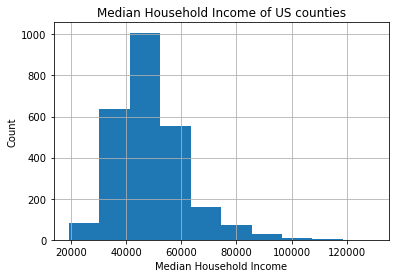

In [14]:
df['median_hh_income'].hist()
plt.xlabel("Median Household Income")
plt.ylabel("Count")
plt.title("Median Household Income of US counties")
plt.show()


The distribution is unimodal and right skewed

## 3. <u> Sample Analysis</u>

### 3.a. [0.5 pt] Collect a random sample from this population with replacement of size 200 using a random_state of 100. Display the first 5 rows.

In [15]:
random_sample = df.sample(200, random_state = 100)
random_sample.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
2177,Major County,Oklahoma,7545.0,7527,7693.0,-0.09,13.1,81.0,4.2,3.22,no,hs_diploma,28249.60,52056.0,none
1302,Roscommon County,Michigan,25469.0,24449,23895.0,-0.45,19.8,84.6,3.6,8.91,no,hs_diploma,21877.00,37834.0,none
1749,Douglas County,Nevada,41259.0,46997,48309.0,2.85,9.8,76.2,11.4,4.80,no,some_college,35501.29,61176.0,partial
2004,Emmons County,North Dakota,4331.0,3550,3301.0,-5.20,11.9,84.1,6.9,3.99,no,hs_diploma,30708.92,46581.0,partial
3010,Jefferson County,West Virginia,42190.0,53498,56338.0,2.77,9.9,77.8,10.4,3.15,yes,some_college,33754.62,72526.0,none


### 3.b. [1 pt] Calculate the mean and standard deviation median household income of this sample.

In [16]:
random_sample['median_hh_income'].mean()

50095.855

In [17]:
random_sample['median_hh_income'].std()

13094.484253812432

### 3.c. [1 pt] Plot the sample distribution median household income and describe the shape of the distribution (skew and modality).

Make sure you accurately label the x-axis!

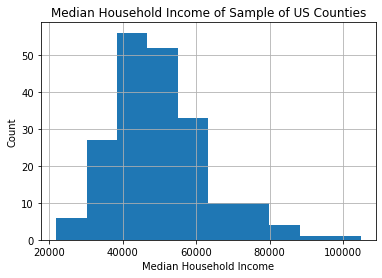

In [18]:
random_sample['median_hh_income'].hist()
plt.xlabel("Median Household Income")
plt.ylabel("Count")
plt.title("Median Household Income of Sample of US Counties")
plt.show()

The distribution is unimodal and slightly right skewed

### 3.d. [2 pt] Create a sampling distribution of sample means (using the median household income variable) with the following specifications:
* the samples are of size 200
* the distribution is comprised of 5000 sample means.

In [19]:
def samplingdist (df, x = '', n = 1, m = 1, replace = True):
    sampling_distribution = []
    for i in range(m):
        sampling_distribution.append(df[x].sample(n, replace = replace).mean())
    return pd.DataFrame({x : sampling_distribution})
        

In [20]:
SampDist = samplingdist(df = df, x = 'median_hh_income', n = 200, m = 5000)
SampDist

,median_hh_income
0,48639.920
1,47770.375
2,49353.815
3,46765.975
4,48805.180
...,...
4995,48174.455
4996,49215.540
4997,49819.155
4998,48835.405


### 3.e. [1 pt] Calculate the mean and standard deviation of this sampling distribution.

In [21]:
SampDist.mean()

median_hh_income    49039.614044
dtype: float64

In [22]:
SampDist.std()

median_hh_income    915.86845
dtype: float64

### 3.f. [1 pt] Plot the sampling distribution and describe the shape (modality and skew).

#### Make sure you accurately label the x-axis.

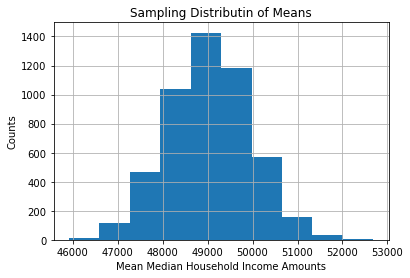

The distribution is unimodal and mostly symmetric


In [23]:
SampDist.hist()
plt.title('Sampling Distributin of Means')
plt.xlabel('Mean Median Household Income Amounts')
plt.ylabel('Counts')
plt.show()

print("The distribution is unimodal and mostly symmetric")

## 4.  <u>Comparing Population and Sampling Distributions</u>

### 4.a. [2 pt] If you randomly sampled a county from the population of counties (post-data cleaning) what would be the probability that this county has a median household income that was at least $52,000?

In [24]:
greater_than = df[df['median_hh_income'] >= 52000]
greater_than.shape[0]
#outputs a dataframe with 869 rows so 869 total cases where median_hh_income is at least 52000

869

In [25]:
prob_greater_than = greater_than.shape[0]/df.shape[0]
prob_greater_than
#869 is calculated from number of rows above and df.shape[0] gives the number of columns in the entire dataset

0.3395857756936303

### 4.b. [1 pt] If you randomly sampled a sample mean from the sampling distribution what would be the probability that sample mean was at least $52,000?

In [26]:
SampDist_greater = SampDist[SampDist['median_hh_income'] >= 52000]
SampDist_greater.shape[0]

5

In [27]:
print(SampDist_greater.shape[0], "/", SampDist.shape[0])


SampDist_greater.shape[0]/SampDist.shape[0]

5 / 5000


0.001

## 5. <u>Probability</u>: 
The work we do here will help develop intuition for topics we will cover in next week's lectures. (You have everything you need to answer these questions though.)

### 5.a. [1 pt] Suppose we were to collect a random sample <u>with replacement</u> of six counties (from our post-data cleaning dataframe). What is the probability that the first and fifth sampled counties have a median income of at least $52,000 and the other four do not?

In [28]:
prob_less_than = 1 - prob_greater_than                                                                  

(prob_greater_than)**2 * prob_less_than ** 4

0.02193636461011993

### 5.b. [1 pt] What is the probability that the second and fourth sampled counties have a median income of at least $52,000 and the other four do not?

In [29]:
prob_less_than = 1 - prob_greater_than                                                                  

(prob_greater_than)**2 * prob_less_than ** 4
#since calculating the same amount of counties to be over 52000

0.02193636461011993

### 5.c. [1 pt] Define the following events as follows.
* <u>event 1</u>: the sample that we collect has the second and fourth sampled counties have a median income of at least \$52,000 and the other four do not
* <u>event 2</u>: the SAME sample that we collect has the first and fifth sampled counties have a median income of at least $52,000 and the other four do not.

### Are event 1 and event 2 mutually exclusive? Why or why not?

The events are mutually exclusive becuase the sampling is being done wiht replacement so the outcome of the first sample has no effect on what the second sample will be

### 5.d. [2 pt] How many possible ways(ie. orderings) can have exactly two of our six sampled counties have a median houeshold income of at least $52,000?

Hint: Event 1 and event 2 above are two ways (orderings) in which this can happen, there are several other ways.

Hint: How many possible ways can we choose two out of the six available positions within the sample (ie. position 1=county that was selected first, position 2=county that was selected second,...) to have a median household income over $52,000.

In [30]:
#(6!)/(2!)(4!))
# 6 * 5 / 2
30/2


15.0

### 5.e. [1 pt] What is the probability that a randomly selected county from the population (post data-cleaning) will have a median educational attainment of 'bachelors'?

In [31]:
bach = df[df['median_edu'] == 'bachelors']
bach

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
206,Marin County,California,247289.0,252409,260955.0,0.81,8.1,64.0,27.0,2.86,yes,bachelors,67062.81,104703.0,partial
223,San Francisco County,California,776733.0,805235,884363.0,5.12,11.7,37.5,66.6,2.90,yes,bachelors,58621.70,96265.0,none
250,Boulder County,Colorado,291288.0,294567,322514.0,4.12,13.1,63.9,28.2,2.43,yes,bachelors,42990.98,75669.0,partial
262,Douglas County,Colorado,175766.0,285465,335299.0,9.59,3.6,82.5,14.9,2.39,yes,bachelors,48499.64,111154.0,partial
270,Gunnison County,Colorado,13956.0,15324,16939.0,8.26,14.1,59.1,28.8,2.00,no,bachelors,28345.76,52651.0,partial
293,Pitkin County,Colorado,14872.0,17148,17890.0,2.67,7.1,62.5,40.0,3.09,no,bachelors,54534.17,67755.0,none
298,Routt County,Colorado,19690.0,23509,25220.0,7.00,10.7,74.1,28.8,2.38,no,bachelors,35613.83,67472.0,partial
301,San Miguel County,Colorado,6594.0,7359,7967.0,4.86,10.5,64.3,40.0,2.85,no,bachelors,40147.88,62243.0,partial
319,District of Columbia,District of Columbia,572059.0,601723,693972.0,6.75,17.4,43.5,61.7,6.05,yes,bachelors,50916.67,77649.0,none
444,Forsyth County,Georgia,98407.0,175511,227967.0,17.43,6.5,86.8,3.8,3.75,yes,bachelors,39356.52,96445.0,none


In [32]:
print(bach.shape[0], "/", df.shape[0])



prob_bach = bach.shape[0]/df.shape[0]
prob_bach

37 / 2559


0.014458772958186792

### Tutorial: Filtering on Multiple Row Conditions in a Dataframe.

* We can use the "&" operator to write (condition 1) & (condition 2), in which condition 1 AND condition 2 must be met.
* We can use the "|" operator to write (condition 1) | (condition 2), in which condition 1 OR condition 2 must be met.

In [33]:
smalldf=pd.DataFrame({'year':['fresh','soph', 'soph', 'junior'], 'major': ['stats','cs','underwater_basket_weaving','cs']})
smalldf

,year,major
0,fresh,stats
1,soph,cs
2,soph,underwater_basket_weaving
3,junior,cs


In [34]:
smalldf[(smalldf['year']=='soph') & (smalldf['major']=='cs')]

,year,major
1,soph,cs


In [35]:
smalldf[(smalldf['year']=='soph') | (smalldf['major']=='cs')]

,year,major
1,soph,cs
2,soph,underwater_basket_weaving
3,junior,cs


### 5.f. [1 pt] What is the probability that if we randomly select a county from our population (post-data cleaning) that the county has a median household income of at least $52,000 and a median education attaintment of a bachelors degree?

In [36]:
both_satisfied = df[(df['median_hh_income']>= 52000) & (df['median_edu'] == 'bachelors')]
both_satisfied.shape[0]

37

In [37]:
print(both_satisfied.shape[0], "/", df.shape[0])



both_satisfied_prob = bach.shape[0]/df.shape[0]
both_satisfied_prob


37 / 2559


0.014458772958186792

### 5.g. [1 pt] Is the event of randomly selecting a county that has a median household income of at least $52,000 independent of the event of randomly selecting a county that has a median education attainment of a bachelor's degree? Why or why not?

In [38]:
both_satisfied_prob == prob_greater_than * prob_bach 
#dependent events becuase these are not equal to each other


False